<a href="https://colab.research.google.com/github/BrunaKrasotaMatos/An-liseEstat-stica/blob/main/Trilha3/Trilha3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# caso não tenha, instale a biblioteca ggplot2
install.packages("ggplot2")
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [61]:
# Pacotes
library(readr)
library(data.table)
library(dplyr)
library(ggplot2)
#library(ggpubr)

# Definir as classes
classes <- c("numeric","character","character","character","numeric","numeric","numeric","numeric","numeric","numeric")
data(diamonds)
diamantes <- diamonds



In [62]:
# Inspecionando os dados
str(diamantes, strict.width = "wrap", give.attr = FALSE)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
$ carat : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
$ cut : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
$ color : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
$ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
$ depth : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
$ table : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
$ price : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
$ x : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
$ y : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
$ z : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [63]:
# Explorando parte inicial e final dos dados

head(diamantes,10)
tail(diamantes,10)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.71,Premium,E,SI1,60.5,55,2756,5.79,5.74,3.49
0.71,Premium,F,SI1,59.8,62,2756,5.74,5.73,3.43
0.70,Very Good,E,VS2,60.5,59,2757,5.71,5.76,3.47
0.70,Very Good,E,VS2,61.2,59,2757,5.69,5.72,3.49
0.72,Premium,D,SI1,62.7,59,2757,5.69,5.73,3.58
0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
0.86,Premium,H,SI2,61.0,58,2757,6.15,6.12,3.74


In [64]:
# Analisando os dados pelo summary
summary(diamantes)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

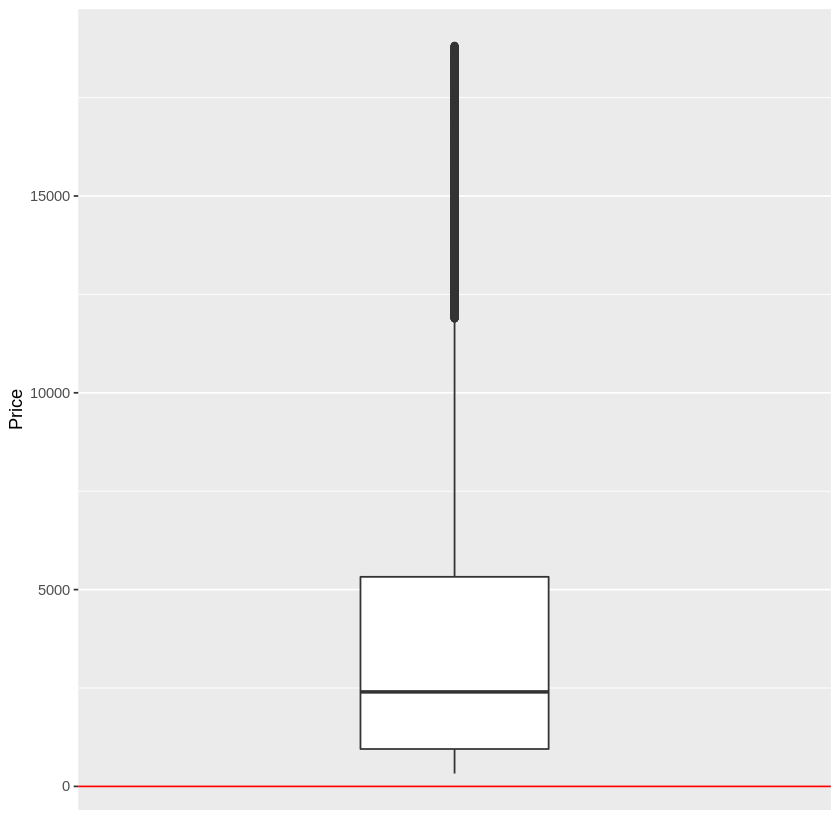

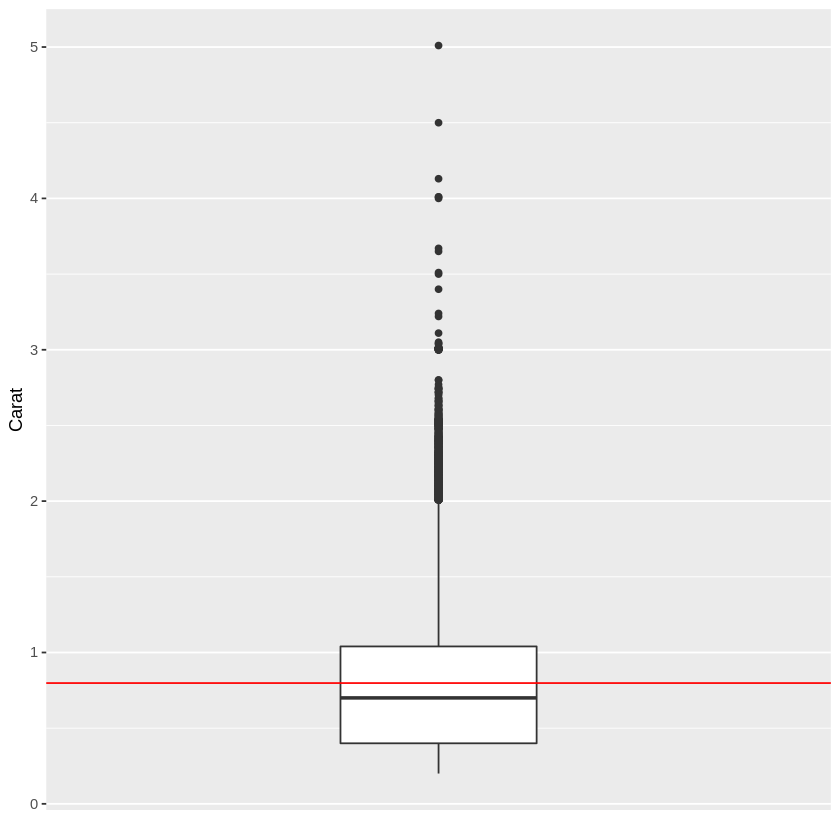

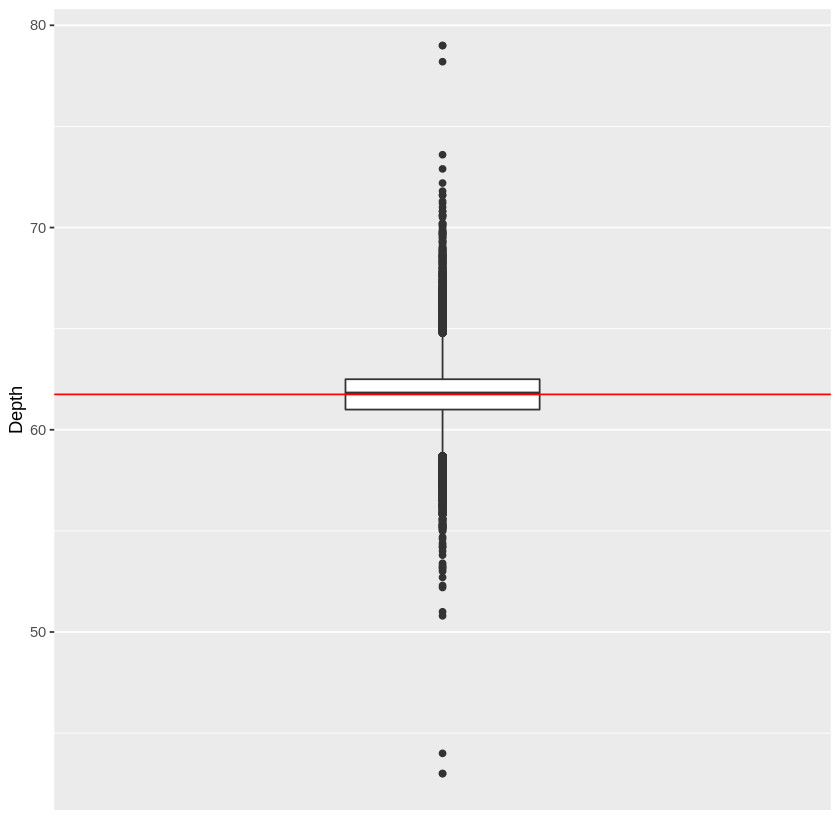

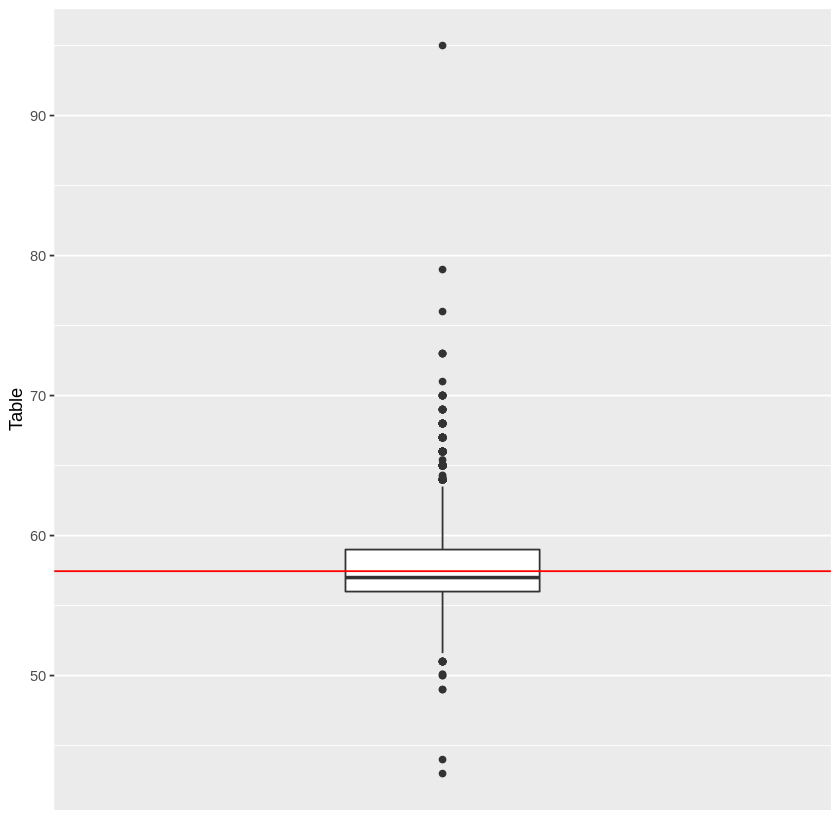

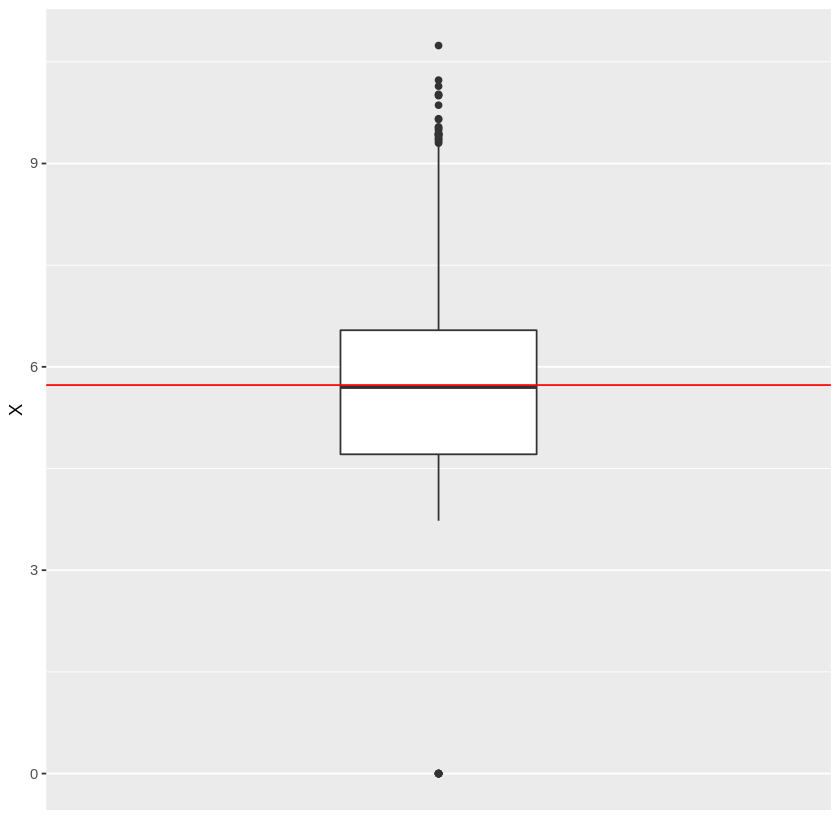

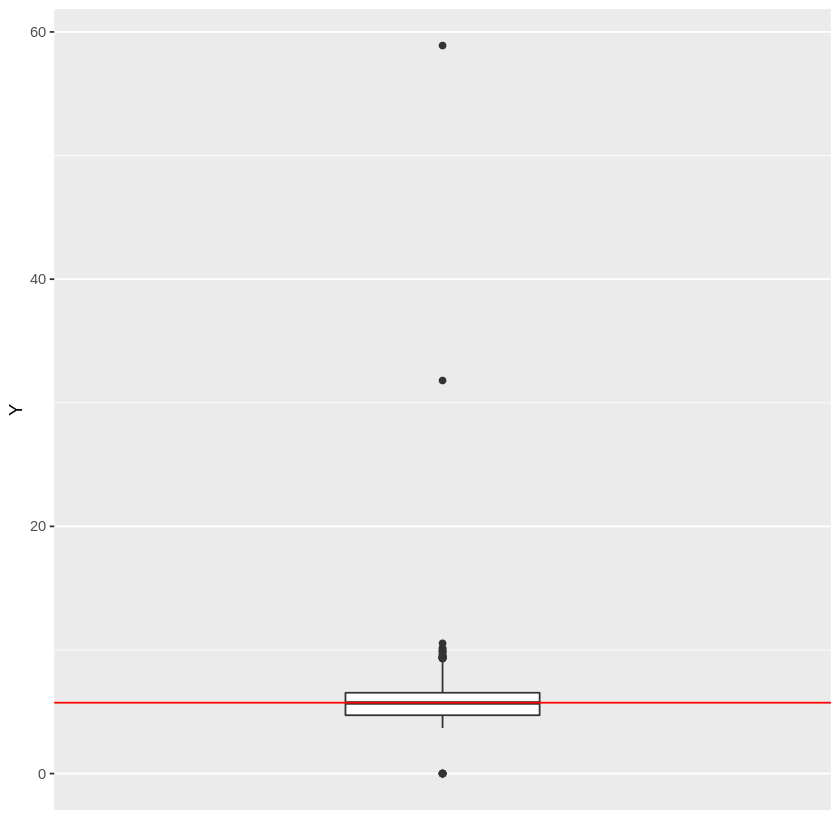

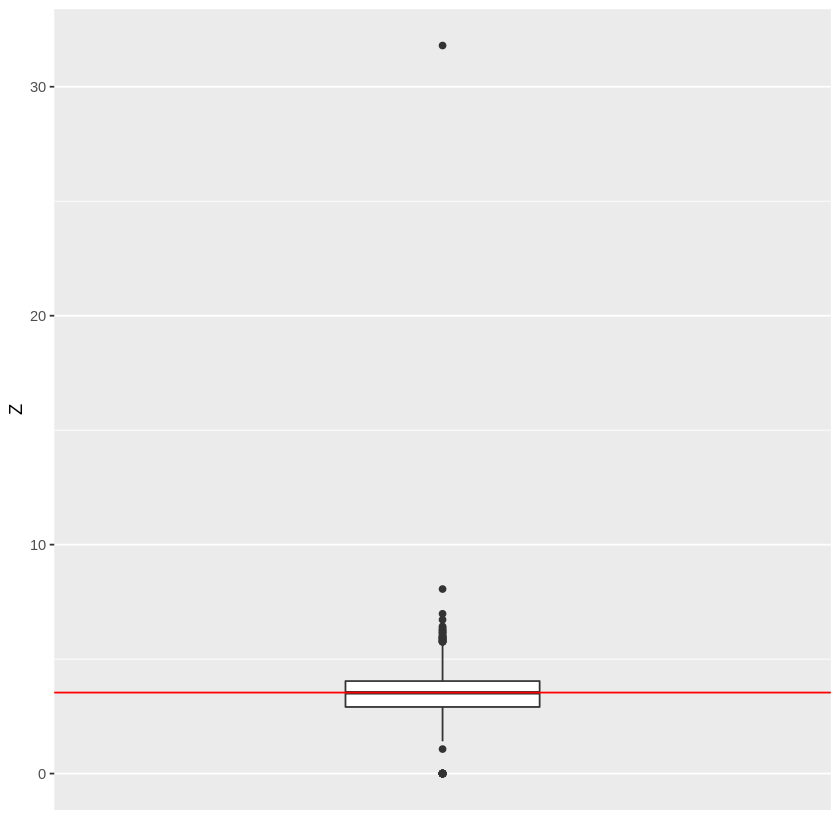

In [65]:
# Grafico box plot
ggplot(data=diamantes) +
  geom_boxplot(
    aes(x = "Price",
        y = price),width = 0.3, varwidth = F) +
    labs(y = "Price",
         x = "") +
    geom_abline(slope=0, intercept=, color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)

# Grafico box plot Carat
ggplot(data=diamantes) +
  geom_boxplot(
    aes(x = "Carat",
        y = carat),width = 0.3, varwidth = F) +
    labs(y = "Carat",
         x = "") +
    geom_abline(slope=0, intercept=mean(diamantes$carat), color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)

# Grafico box plot depth
ggplot(data=diamantes) +
  geom_boxplot(
    aes(x = "Depth",
        y = depth),width = 0.3, varwidth = F) +
    labs(y = "Depth",
         x = "") +
    geom_abline(slope=0, intercept=mean(diamantes$depth), color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)

# Grafico box plot table
ggplot(data=diamantes) +
  geom_boxplot(
    aes(x = "Table",
        y = table),width = 0.3, varwidth = F) +
    labs(y = "Table",
         x = "") +
    geom_abline(slope=0, intercept=mean(diamantes$table), color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)

# Grafico box plot x
ggplot(data=diamantes) +
  geom_boxplot(
    aes(x = "X",
        y = x),width = 0.3, varwidth = F) +
    labs(y = "X",
         x = "") +
    geom_abline(slope=0, intercept=mean(diamantes$x), color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)

# Grafico box plot y
ggplot(data=diamantes) +
  geom_boxplot(
    aes(x = "Y",
        y = y),width = 0.3, varwidth = F) +
    labs(y = "Y",
         x = "") +
    geom_abline(slope=0, intercept=mean(diamantes$y), color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)

# Grafico box plot z
ggplot(data=diamantes) +
  geom_boxplot(
    aes(x = "Z",
        y = z),width = 0.3, varwidth = F) +
    labs(y = "Z",
         x = "") +
    geom_abline(slope=0, intercept=mean(diamantes$z), color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)

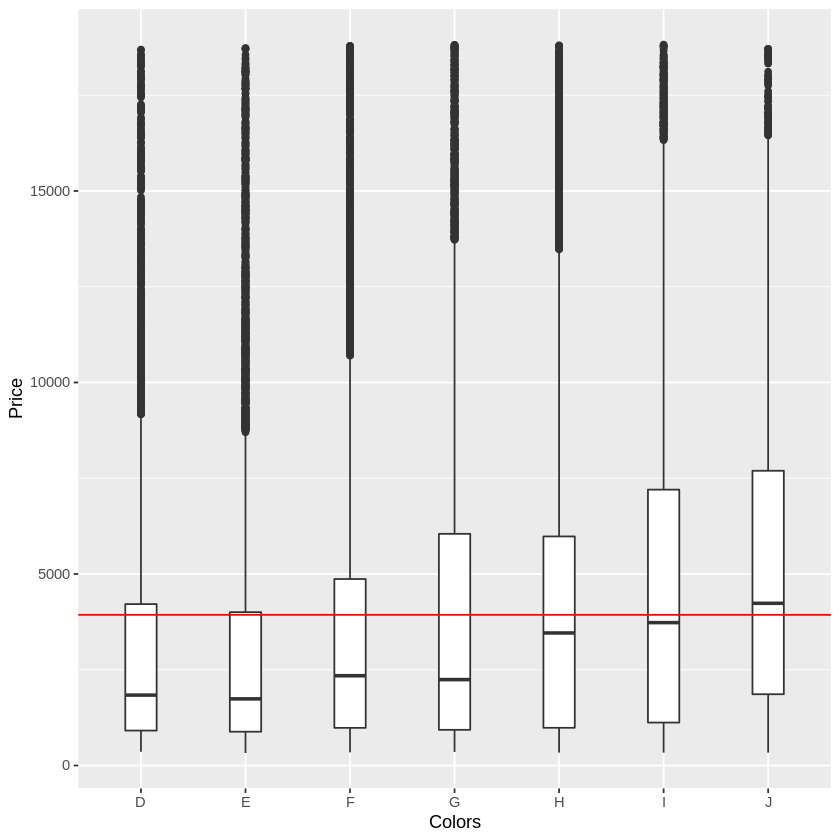

In [86]:
# Grafico box plot com regioes
ggplot(data=diamantes) +
  geom_boxplot(
    aes(x = color,
        y = price),width = 0.3, show.legend=TRUE) +
    labs(y = "Price",
         x = "Colors") +
    geom_abline(slope=0, intercept=3933, color="red") 

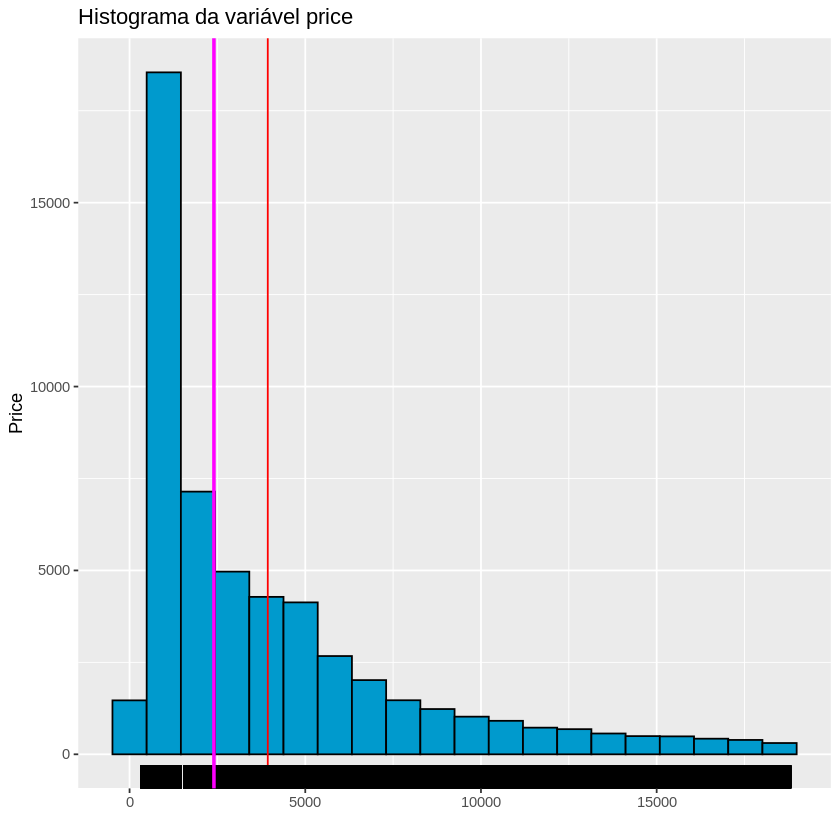

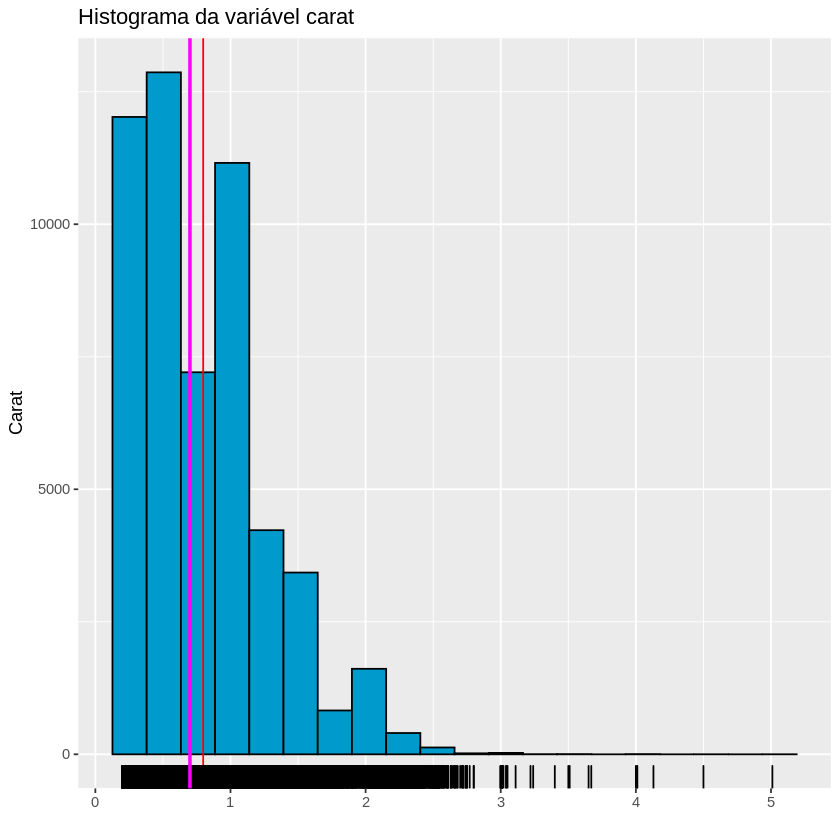

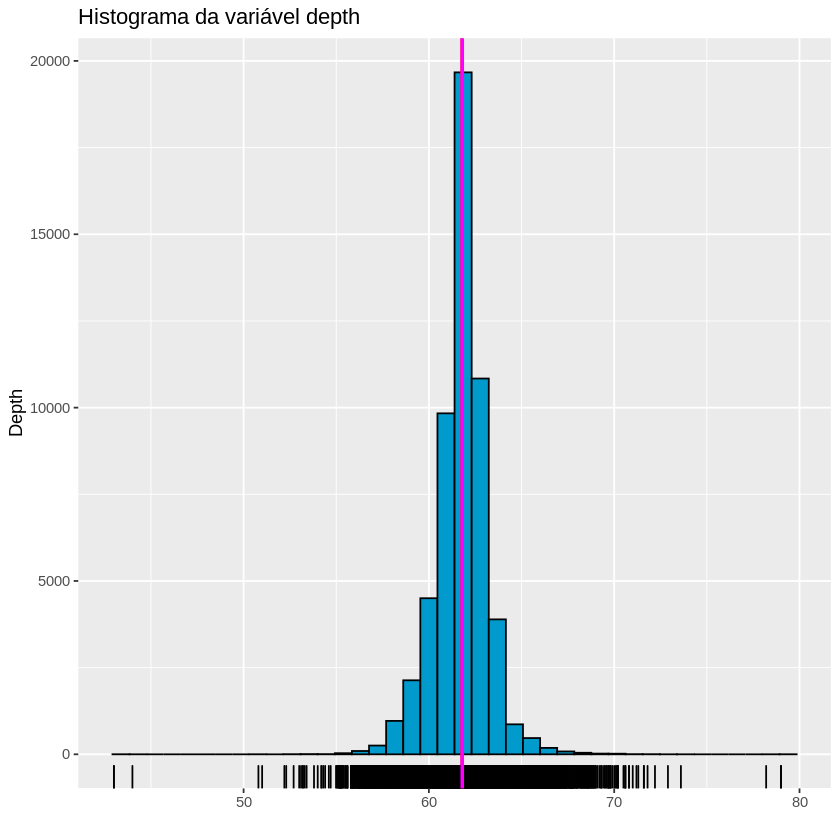

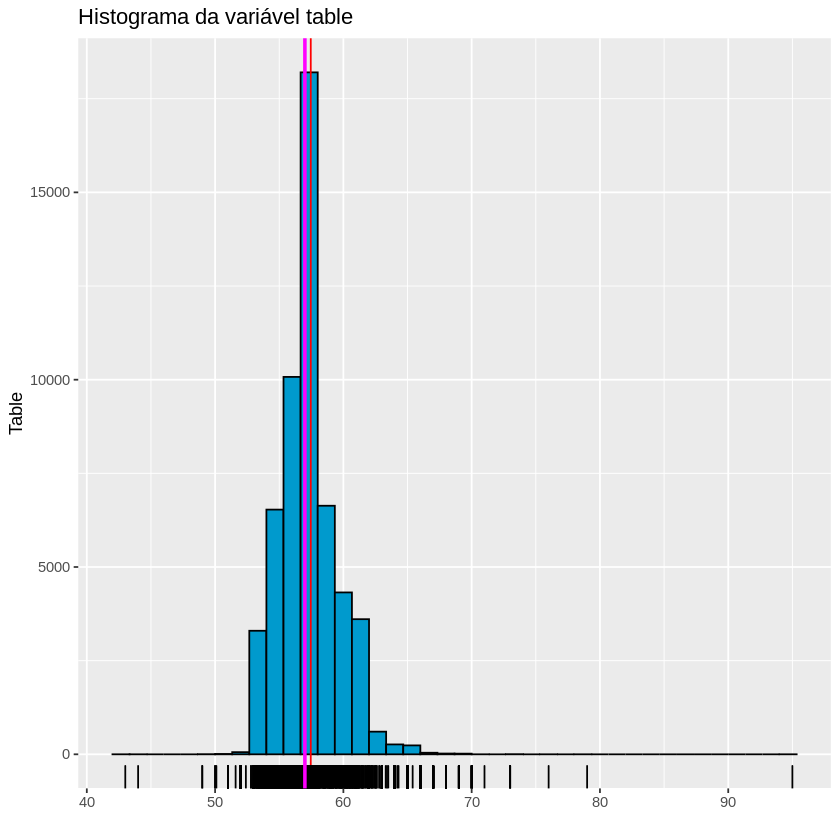

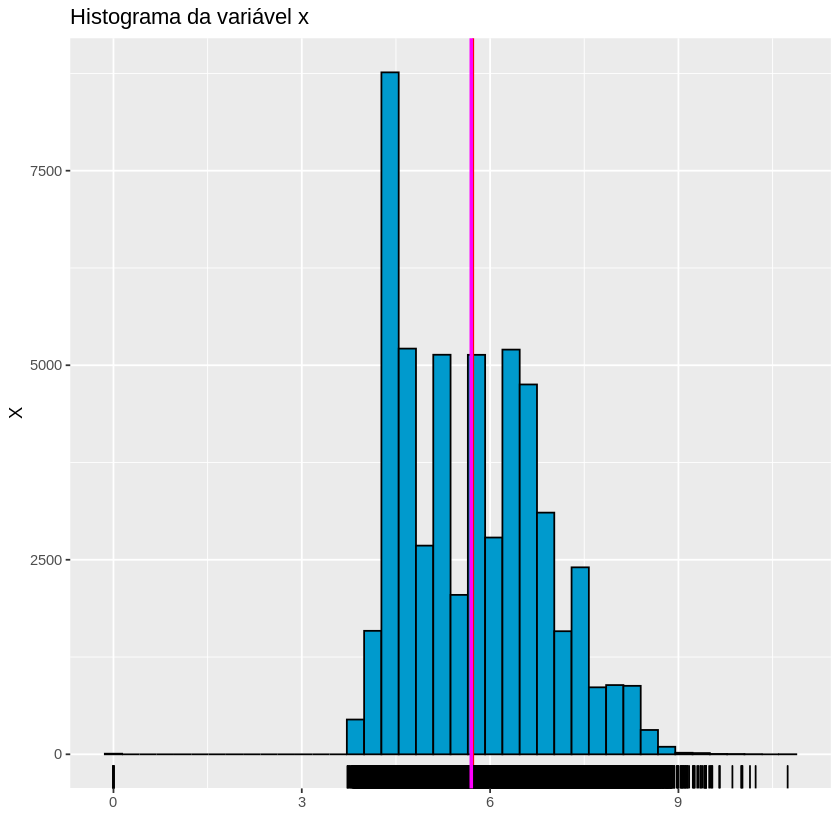

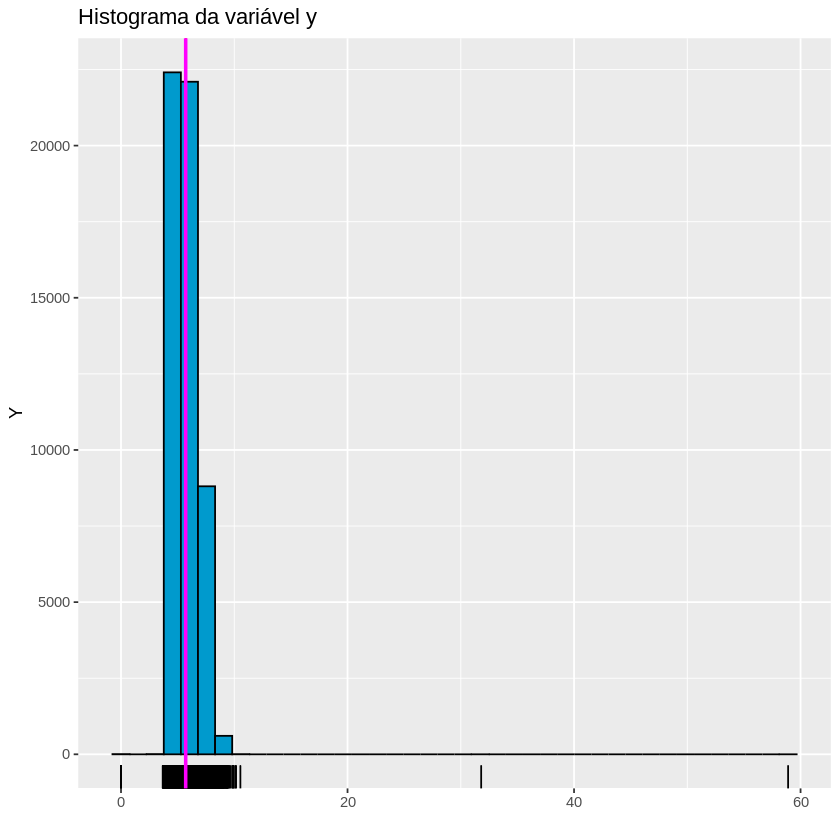

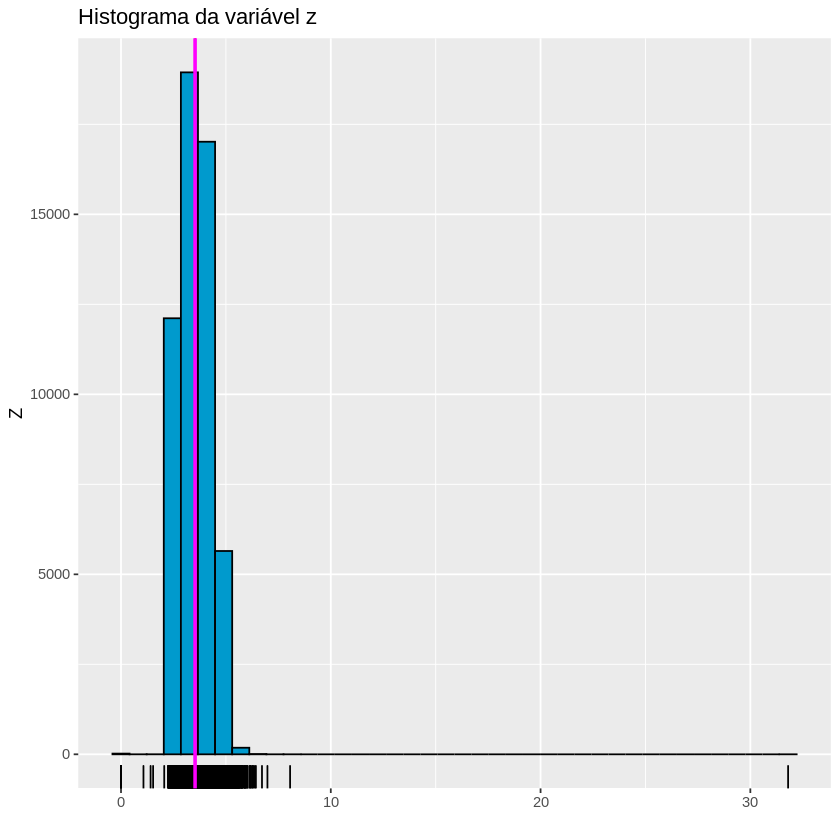

In [80]:
# Grafico histograma
ggplot(data=diamantes) +
  geom_histogram(
    aes(price),bins = 20, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável price", y = "Price",
         x = "") +
    geom_vline(xintercept = 3933, color = "red") +
    geom_rug(aes(price)) +
    geom_vline(xintercept = median(diamantes$price), color = "magenta", lwd = 1) 

# Grafico histograma carat
ggplot(data=diamantes) +
  geom_histogram(
    aes(carat),bins = 20, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável carat", y = "Carat",
         x = "") +
    geom_vline(xintercept = mean(diamantes$carat), color = "red") +
    geom_rug(aes(carat)) +
    geom_vline(xintercept = median(diamantes$carat), color = "magenta", lwd = 1)

# Grafico histograma depth
ggplot(data=diamantes) +
  geom_histogram(
    aes(depth),bins = 40, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável depth", y = "Depth",
         x = "") +
    geom_vline(xintercept = mean(diamantes$depth), color = "red") +
    geom_rug(aes(depth)) +
    geom_vline(xintercept = median(diamantes$depth), color = "magenta", lwd = 1)

# Grafico histograma table
ggplot(data=diamantes) +
  geom_histogram(
    aes(table),bins = 40, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável table", y = "Table",
         x = "") +
    geom_vline(xintercept = mean(diamantes$table), color = "red") +
    geom_rug(aes(table)) +
    geom_vline(xintercept = median(diamantes$table), color = "magenta", lwd = 1)

# Grafico histograma x
ggplot(data=diamantes) +
  geom_histogram(
    aes(x),bins = 40, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável x", y = "X",
         x = "") +
    geom_vline(xintercept = mean(diamantes$x), color = "red") +
    geom_rug(aes(x)) +
    geom_vline(xintercept = median(diamantes$x), color = "magenta", lwd = 1)

# Grafico histograma y
ggplot(data=diamantes) +
  geom_histogram(
    aes(y),bins = 40, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável y", y = "Y",
         x = "") +
    geom_vline(xintercept = mean(diamantes$y), color = "red") +
    geom_rug(aes(y)) +
    geom_vline(xintercept = median(diamantes$y), color = "magenta", lwd = 1)

# Grafico histograma z
ggplot(data=diamantes) +
  geom_histogram(
    aes(z),bins = 40, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável z", y = "Z",
         x = "") +
    geom_vline(xintercept = mean(diamantes$z), color = "red") +
    geom_rug(aes(z)) +
    geom_vline(xintercept = median(diamantes$z), color = "magenta", lwd = 1)

Warning message:
“Ignoring unknown parameters: varwidth”


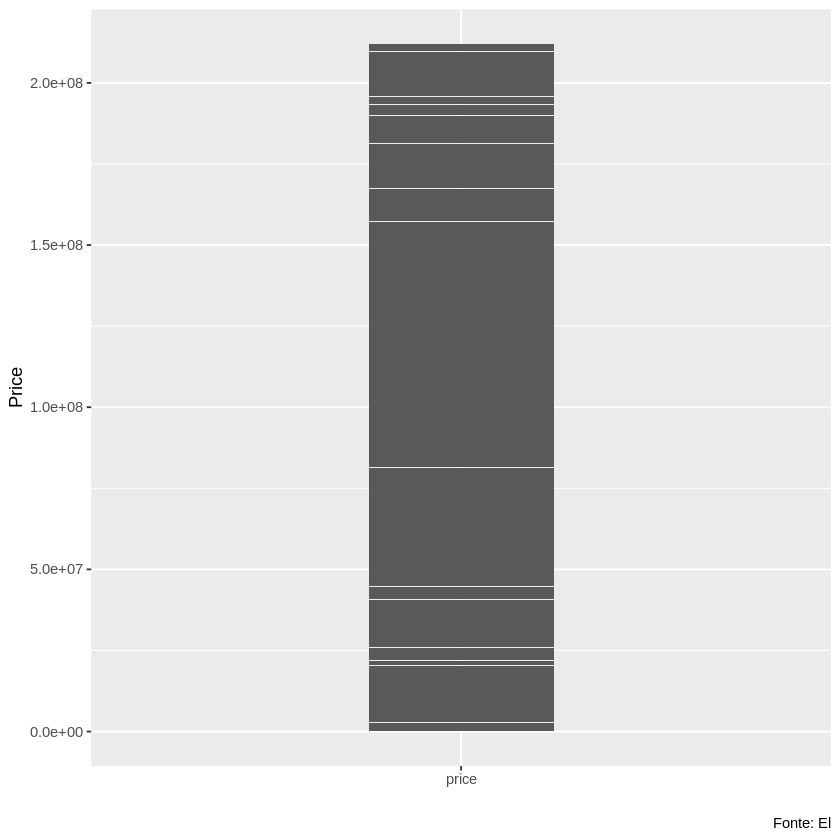

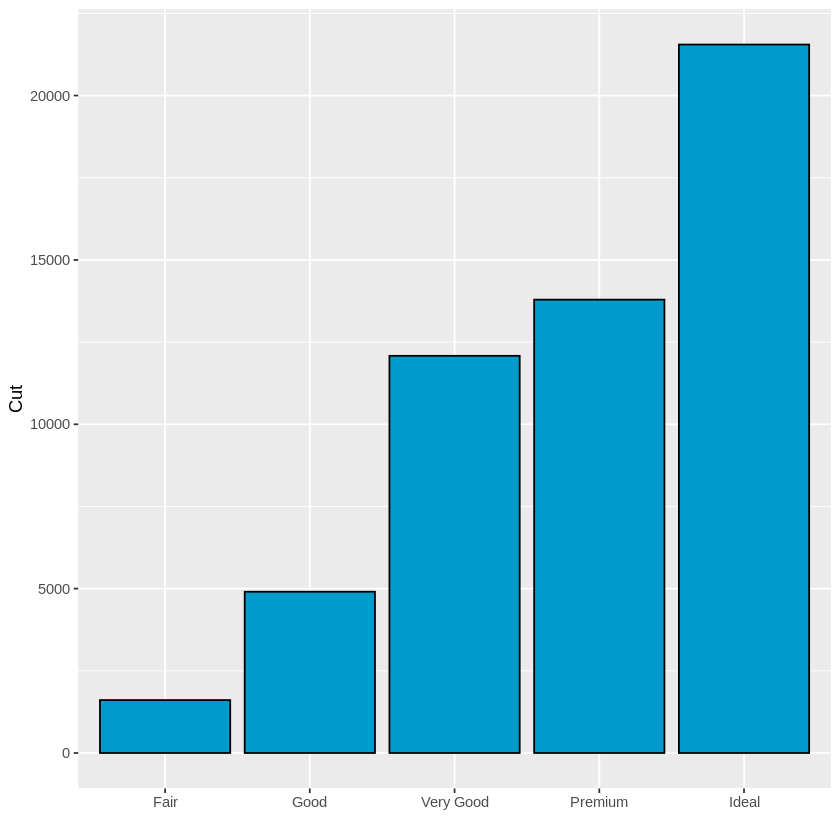

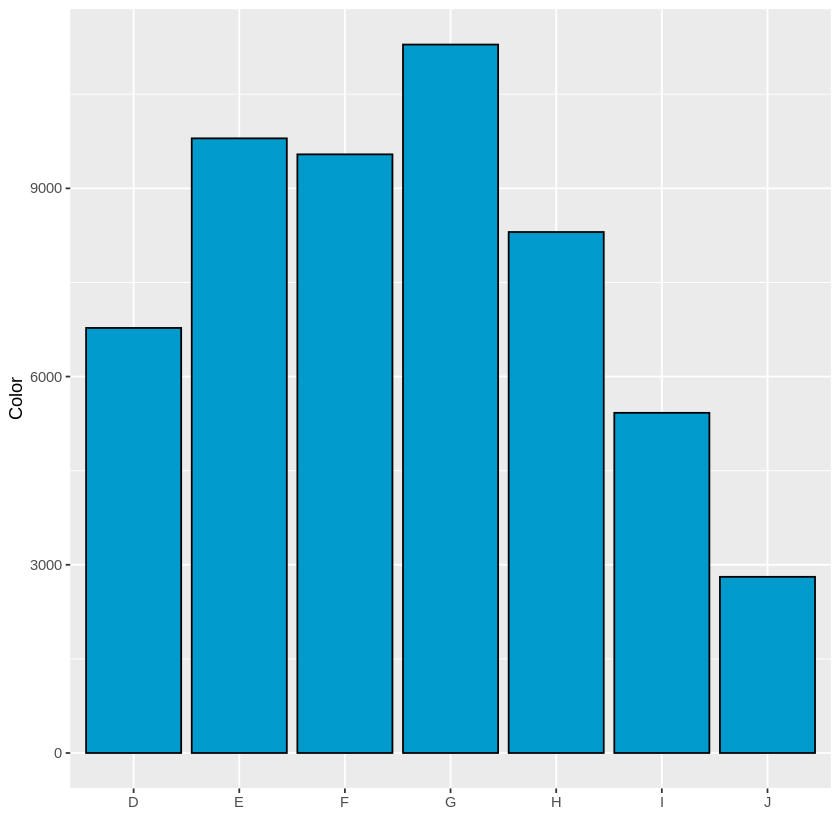

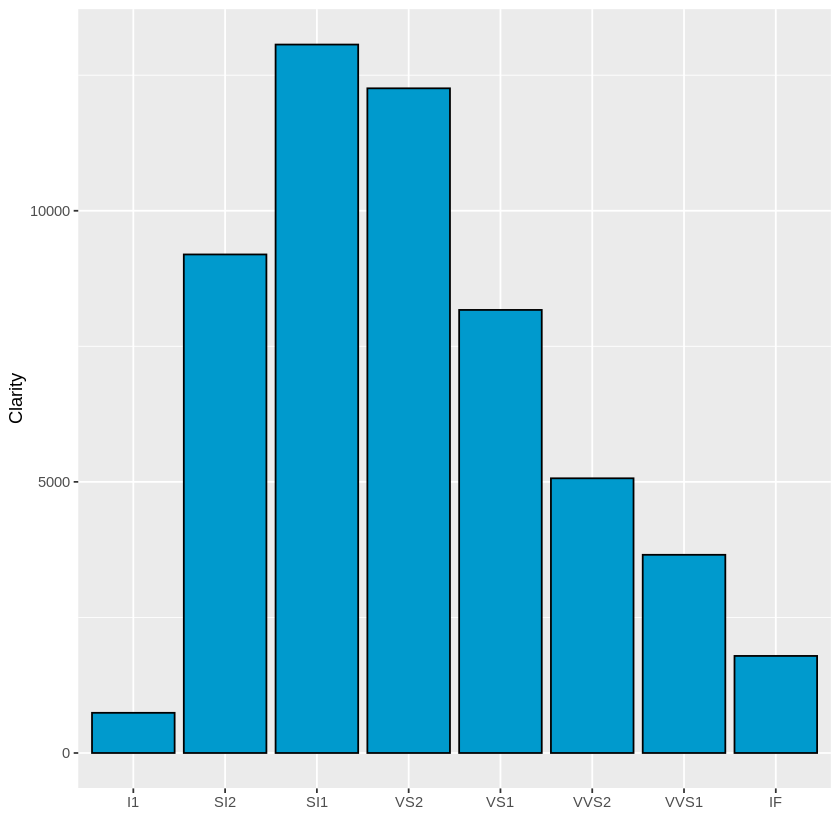

In [70]:
# Grafico de colunas o que acontece quando usamos variáveis erradas!
ggplot(data=diamantes) +
  geom_col(
    aes(x = "price",
        y = price),width = 0.3, varwidth = F) +
    labs(y = "Price",
         x = "", caption = "Fonte: El") 
# cut        color        clarity 
ggplot(data=diamantes) +
  geom_bar(
    aes(x = cut),fill = "deepskyblue3", color = "black") +
    labs(y = "Cut",
         x = "") 

ggplot(data=diamantes) +
  geom_bar(
    aes(x = color),fill = "deepskyblue3", color = "black") +
    labs(y = "Color",
         x = "") 

ggplot(data=diamantes) +
  geom_bar(
    aes(x = clarity),fill = "deepskyblue3", color = "black") +
    labs(y = "Clarity",
         x = "") 

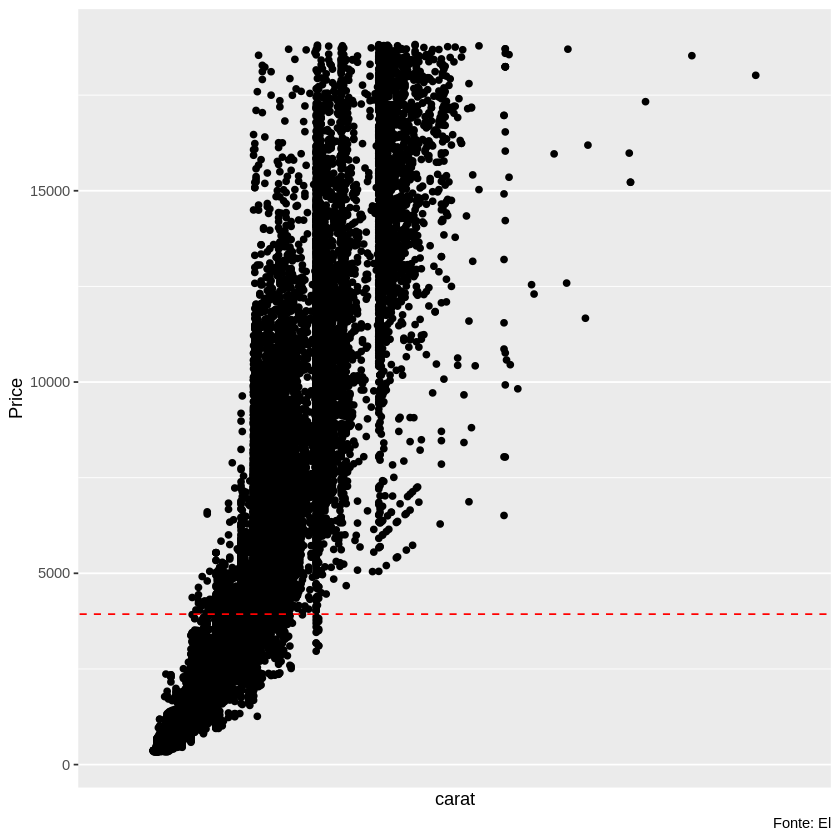

In [ ]:
# Grafico de pontos
ggplot(data=diamantes) +
  geom_point(
    aes(x = carat, y = price)) +
    labs(y = "Price",
         x = "carat", caption = "Fonte: El") +
    geom_abline(slope=0, intercept=3933, linetype = 2, color="red") +
    scale_x_discrete(labels = NULL, breaks = NULL)

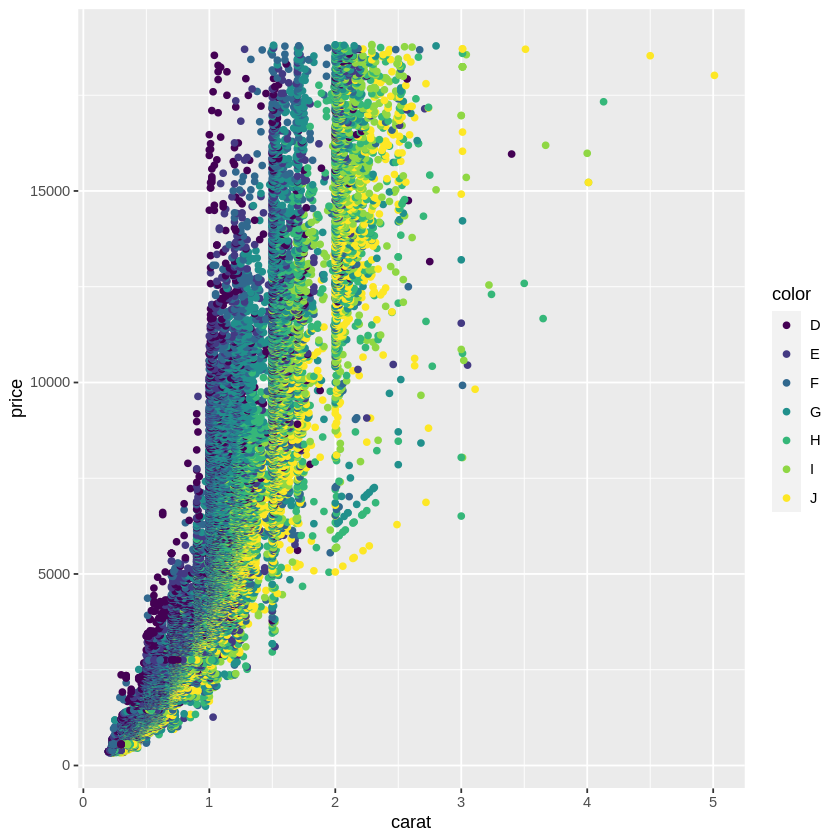

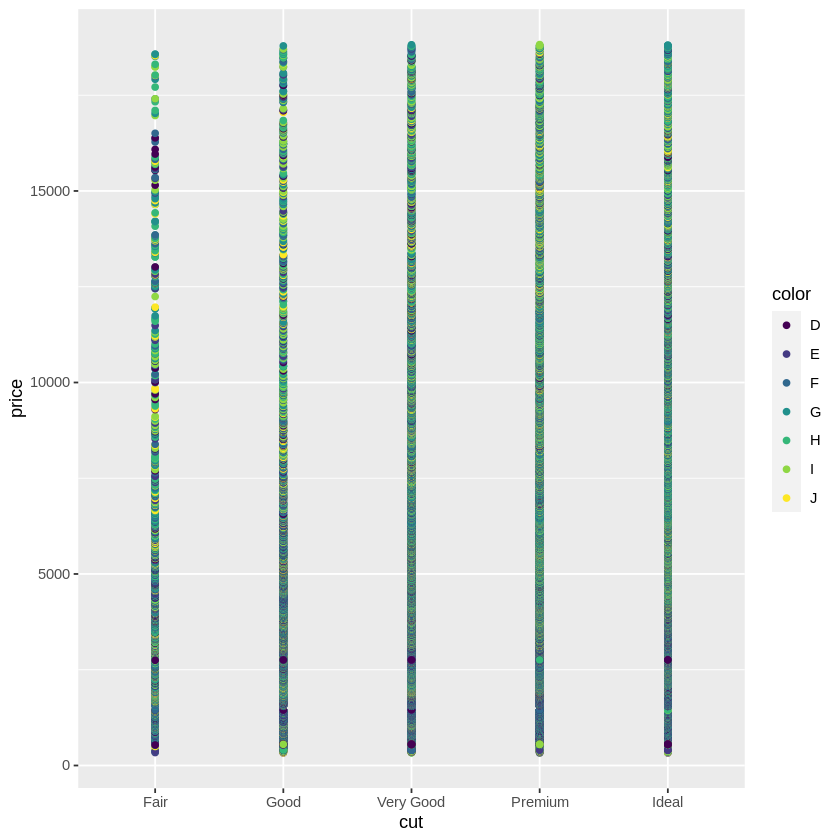

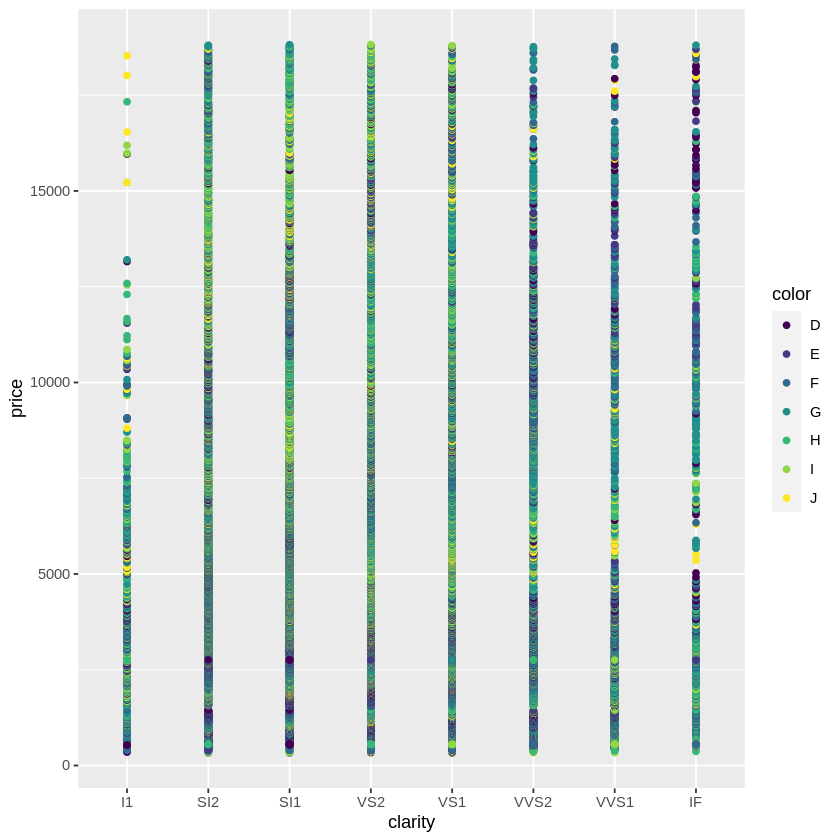

In [72]:
# Grafico colorido de pontos
ggplot(data=diamantes) +
  geom_point(
    aes(x = carat, y = price, color = color))

ggplot(data=diamantes) +
  geom_point(
    aes(x = cut, y = price, color = color))

ggplot(data=diamantes) +
  geom_point(
    aes(x = clarity, y = price, color = color))



In [ ]:
ggplot(data=diamantes) +
  geom_col(
    aes(x = "price",
        y = price),width = 0.3, varwidth = F) +
    labs(y = "Price",
         x = "", caption = "Fonte: El") 